In [ ]:
!pip install ultralytics opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install gdown
import gdown
#https://drive.google.com/file/d/1vCn1KZEhJe8a71mDswsUNxkR8ktKNKdT/view?usp=drive_link
#https://drive.google.com/file/d/1IPxySBZtSbzPKJ9KmVSzni-uX-27u8qg/view?usp=drive_link
file_id1 = "1vCn1KZEhJe8a71mDswsUNxkR8ktKNKdT"
file_id2 = "1IPxySBZtSbzPKJ9KmVSzni-uX-27u8qg"

gdown.download(f"https://drive.google.com/uc?id={file_id1}", "Mundhawan_Circle_SLR_2_Part4.mp4", quiet=False)
gdown.download(f"https://drive.google.com/uc?id={file_id2}", "Mundhawan_Circle_SLR_2_Part3.mp4", quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1vCn1KZEhJe8a71mDswsUNxkR8ktKNKdT
From (redirected): https://drive.google.com/uc?id=1vCn1KZEhJe8a71mDswsUNxkR8ktKNKdT&confirm=t&uuid=67c89922-f908-4d5b-a1b2-d31baa55d609
To: /content/Mundhawan_Circle_SLR_2_Part4.mp4
100%|██████████| 223M/223M [00:05<00:00, 40.7MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1IPxySBZtSbzPKJ9KmVSzni-uX-27u8qg
From (redirected): https://drive.google.com/uc?id=1IPxySBZtSbzPKJ9KmVSzni-uX-27u8qg&confirm=t&uuid=61c8550a-58ce-4056-8489-4dcb38db9e24
To: /content/Mundhawan_Circle_SLR_2_Part3.mp4
100%|██████████| 222M/222M [00:04<00:00, 54.5MB/s]


'Mundhawan_Circle_SLR_2_Part3.mp4'

To apply polygon to define area for tracking
https://ij.imjoy.io/

In [4]:
import cv2

from ultralytics import solutions

cap = cv2.VideoCapture("./Mundhawan_Circle_SLR_2_Part3.mp4")
assert cap.isOpened(), "Error reading video file"

# Pass region as list
# region_points = [(20, 400), (1080, 400), (1080, 360), (20, 360)]

# Pass region as dictionary
region_points = {
    "north-out": [(416,338), (672,322),(1004,378),(930,522),(324,348)],
    #"region-02": [(640, 640), (780, 640), (780, 720), (640, 720)],
}

# Video writer
w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))
video_writer = cv2.VideoWriter("region_counting.avi", cv2.VideoWriter_fourcc(*"mp4v"), fps, (w, h))

# Initialize region counter object
regioncounter = solutions.RegionCounter(
    show=True,  # display the frame
    region=region_points,  # pass region points
    model="yolo11n.pt",  # model for counting in regions i.e yolo11s.pt
)

# Process video
while cap.isOpened():
    success, im0 = cap.read()

    if not success:
        print("Video frame is empty or processing is complete.")
        break

    results = regioncounter(im0)

    # print(results)  # access the output

    video_writer.write(results.plot_im)

cap.release()
video_writer.release()
cv2.destroyAllWindows()  # destroy all opened windows

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics Solutions: ✅ {'source': None, 'model': 'yolo11n.pt', 'classes': None, 'show_conf': True, 'show_labels': True, 'region': {'north-out': [(416, 338), (672, 322), (1004, 378), (930, 522), (324, 348)]}, 'colormap': 21, 'show_in': True, 'show_out': True, 'up_angle': 145.0, 'down_angle': 90, 'kpts': [6, 8, 10], 'analytics_type': 'line', 'figsize': (12.8, 7.2), 'blur_ratio': 0.5, 'vision_point': (20, 20), 'crop_dir': 'cropped-detections', 'json_file': None, 'line_width': 2, 'records': 5, 'fps': 30.0, 'max_hist': 5, 'meter_per_pixel': 0.05, 'max_speed': 120, 'show': True, 'iou': 0.7, 'conf': 0.25, 'device': None, 'max_det': 300, 'half': False, 'tracker': 'botsort.yaml', 'verbos

Streaming output truncated to the last 5000 lines.

3212: 480x640 6.1ms, 21 car, 2 motorcycle, 1 bus, 2 person, 1 truck
Speed: 231.9ms track, 6.1ms solution per image at shape (1, 3, 480, 640)

3213: 480x640 6.1ms, 21 car, 1 motorcycle, 1 bus, 2 person, 2 truck
Speed: 212.0ms track, 6.1ms solution per image at shape (1, 3, 480, 640)

3214: 480x640 5.9ms, 22 car, 1 motorcycle, 1 bus, 2 person, 1 truck
Speed: 217.8ms track, 5.9ms solution per image at shape (1, 3, 480, 640)

3215: 480x640 6.1ms, 22 car, 1 motorcycle, 1 bus, 2 person, 1 truck
Speed: 219.0ms track, 6.1ms solution per image at shape (1, 3, 480, 640)

3216: 480x640 6.0ms, 22 car, 1 truck, 1 motorcycle, 1 bus, 2 person
Speed: 212.6ms track, 6.0ms solution per image at shape (1, 3, 480, 640)

3217: 480x640 6.0ms, 21 car, 1 motorcycle, 1 bus, 2 person
Speed: 228.3ms track, 6.0ms solution per image at shape (1, 3, 480, 640)

3218: 480x640 6.2ms, 23 car, 2 motorcycle, 1 truck, 1 person
Speed: 214.9ms track, 6.2ms solution per ima

In [5]:
"""
YOLOv11 Vehicle Tracking & Trajectory Visualization
--------------------------------------------------
Features
- Tracks specified classes (e.g., car, bus, motorcycle) from a video using Ultralytics YOLO (v11 weights).
- Draws per-object trails (polylines) on the output video; color is consistent per CLASS (all cars same color, etc.).
- Saves per-frame CSV: frame index, total frames, class, id (class-prefixed stable ID), centroid (x, y).
- Optional ROI (polygon) filtering: when enabled, only detections whose centroids fall inside the polygon are logged and trailed.
- Generates a static trajectory plot (PNG) from the CSV with class-wise colors.

Usage
-----
python yolo11_track_and_trace.py \
  --source /path/to/video.mp4 \
  --weights yolo11n.pt \
  --classes car,motorcycle,bus \
  --output_video traced_output.mp4 \
  --csv_path traces.csv \
  --plot_path trajectories.png \
  --enable_roi \
  --roi_points "100,100 800,100 800,600 100,600"

Notes
-----
- Install deps: pip install ultralytics opencv-python numpy pandas matplotlib shapely
- Ultralytics should include a default ByteTrack tracker config; we reference 'bytetrack.yaml'.
- If you don't have YOLOv11 weights locally, replace with any compatible YOLO weights (e.g., 'yolov8n.pt') and the rest still works.
"""

import argparse
import ast
import os
from collections import defaultdict

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
from ultralytics import YOLO


# ------------- Utility Functions -------------

def parse_classes_arg(classes_str: str):
    """Parses comma/space-separated class names into a clean list."""
    if not classes_str:
        return []
    parts = [p.strip() for p in classes_str.replace(" ", ",").split(",") if p.strip()]
    return parts


def parse_roi_points(arg: str):
    """Parse ROI points from a string like "x1,y1 x2,y2 x3,y3" into a list of (x,y)."""
    if not arg:
        return []
    pts = []
    for token in arg.strip().split():
        x_str, y_str = token.split(",")
        pts.append((float(x_str), float(y_str)))
    return pts


def get_class_color_map(selected_classes, seed=42):
    """Assign a consistent BGR color per class for OpenCV drawing and Matplotlib plotting (converted)."""
    rng = np.random.default_rng(seed)
    color_map = {}
    for cls in selected_classes:
        # Random distinct colors; OpenCV uses BGR
        color = rng.integers(0, 256, size=3, dtype=np.uint8)
        color_map[cls] = (int(color[0]), int(color[1]), int(color[2]))
    return color_map


def centroid_from_xyxy(xyxy: np.ndarray):
    x1, y1, x2, y2 = xyxy
    return (float((x1 + x2) / 2.0), float((y1 + y2) / 2.0))


# ------------- Main Processing -------------

def track_and_trace(
    source: str,
    weights: str,
    classes_to_track: list,
    output_video_path: str,
    csv_path: str,
    plot_path: str,
    enable_roi: bool = False,
    roi_points: list = None,
    tracker_cfg: str = "bytetrack.yaml",
    conf: float = 0.25,
    iou: float = 0.45,
    device: str = "",
):
    """Run YOLO tracking, draw trails, save CSV and trajectory plot.

    Args:
        source: Path to input video.
        weights: Path to YOLO weights (e.g., yolo11n.pt).
        classes_to_track: List of class names to track (e.g., ["car", "motorcycle", "bus"]).
        output_video_path: Path to save annotated video.
        csv_path: Path to save per-frame csv.
        plot_path: Path to save trajectory plot.
        enable_roi: If True, only consider detections whose centroid lies within ROI polygon.
        roi_points: List of (x, y) pairs defining polygon in image coords.
        tracker_cfg: Ultralytics tracker config file (e.g., bytetrack.yaml).
        conf: Confidence threshold for detection.
        iou: IoU threshold for NMS.
        device: Device string for Ultralytics ("cpu", "cuda:0", etc.).
    """

    # Load model
    model = YOLO(weights)

    # Validate source
    cap = cv2.VideoCapture(source)
    if not cap.isOpened():
        raise FileNotFoundError(f"Unable to open video: {source}")

    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT) or 0)
    fps = cap.get(cv2.CAP_PROP_FPS) or 30
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Prepare VideoWriter
    fourcc = cv2.VideoWriter_fourcc(*"mp4v")
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

    # Prepare ROI polygon if enabled
    polygon = None
    if enable_roi and roi_points and len(roi_points) >= 3:
        polygon = Polygon(roi_points)

    # Map Ultralytics class IDs to names
    model_names = model.model.names if hasattr(model.model, "names") else model.names

    # If user gave classes, ensure they exist in model names
    if classes_to_track:
        missing = [c for c in classes_to_track if c not in model_names.values() and c not in model_names]
        if missing:
            print(f"Warning: some requested classes not found in model names: {missing}")

    # Build class color map from names actually used
    # If user didn't provide, default to all detectable classes
    if not classes_to_track:
        if isinstance(model_names, dict):
            classes_to_track = list(model_names.values())
        else:
            classes_to_track = list(model_names)

    class_colors = get_class_color_map(classes_to_track)

    # Trails per (class_name, stable_class_local_id) list of points
    trails = defaultdict(list)

    # Map global tracker IDs to class-prefixed local IDs (car1, bus1, ...)
    class_id_counters = defaultdict(int)
    global_to_class_local_id = {}

    # CSV rows
    rows = []

    # We will iterate frames with Ultralytics track(stream=True) to get ids
    # Keep Ultralytics persistent tracker across frames
    gen = model.track(
        source=source,
        stream=True,
        tracker=tracker_cfg,
        persist=True,
        conf=conf,
        iou=iou,
        device=device or None,
        verbose=False,
    )

    frame_idx = -1
    for result in gen:
        frame_idx += 1
        frame = result.orig_img.copy()  # BGR frame

        # Draw ROI polygon if provided
        if polygon is not None:
            roi_int = np.array(roi_points, dtype=np.int32)
            cv2.polylines(frame, [roi_int], isClosed=True, color=(0, 255, 255), thickness=2)

        boxes = result.boxes
        if boxes is None or len(boxes) == 0:
            out.write(frame)
            continue

        # For each detection with an assigned tracker ID
        xyxys = boxes.xyxy.cpu().numpy()
        clss = boxes.cls.cpu().numpy().astype(int)
        ids = boxes.id
        ids = ids.cpu().numpy().astype(int) if ids is not None else np.array([-1] * len(boxes))

        for det_i in range(len(boxes)):
            cls_id = clss[det_i]
            # Retrieve class name correctly from dict or list
            if isinstance(model_names, dict):
                cls_name = model_names.get(cls_id, str(cls_id))
            else:
                cls_name = model_names[cls_id]

            if cls_name not in classes_to_track:
                continue

            track_id_global = ids[det_i]
            if track_id_global < 0:
                continue  # skip detections without tracker ID

            # Map to class-local id like car1, car2, ...
            if track_id_global not in global_to_class_local_id:
                class_id_counters[cls_name] += 1
                global_to_class_local_id[track_id_global] = f"{cls_name}{class_id_counters[cls_name]}"

            class_local_id = global_to_class_local_id[track_id_global]

            # Centroid
            cx, cy = centroid_from_xyxy(xyxys[det_i])

            # ROI filtering
            if polygon is not None:
                if not Polygon(roi_points).contains(Point(cx, cy)):
                    continue

            # Log CSV row
            rows.append({
                "frame": frame_idx,
                "total_frames": total_frames,
                "class": cls_name,
                "id": class_local_id,
                "cx": round(cx, 2),
                "cy": round(cy, 2),
            })

            # Update trail and draw
            trails[(cls_name, class_local_id)].append((int(cx), int(cy)))

            # Draw the current trail polyline
            color = class_colors.get(cls_name, (255, 255, 255))
            pts = trails[(cls_name, class_local_id)]
            if len(pts) >= 2:
                cv2.polylines(frame, [np.array(pts, dtype=np.int32)], isClosed=False, color=color, thickness=2)

            # Also draw current bbox & label
            x1, y1, x2, y2 = xyxys[det_i].astype(int)
            cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
            label = f"{cls_name} | {class_local_id}"
            cv2.putText(frame, label, (x1, max(0, y1 - 7)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2, cv2.LINE_AA)

        out.write(frame)

    # Cleanup
    cap.release()
    out.release()

    # Save CSV
    if rows:
        df = pd.DataFrame(rows)
        df.to_csv(csv_path, index=False)
        print(f"Saved CSV: {csv_path} | {len(df)} rows")
    else:
        print("No rows captured (check classes/ROI settings). CSV not saved.")
        return

    # Plot from CSV
    plot_trajectories_from_csv(csv_path, plot_path, class_colors)


# ------------- Plotting -------------

def plot_trajectories_from_csv(csv_path: str, plot_path: str, class_colors: dict):
    df = pd.read_csv(csv_path)
    plt.figure(figsize=(10, 8))

    # For a neat look, plot per (class, id) line; ensure per-class colors
    for (cls_name, obj_id), g in df.groupby(["class", "id"]):
        color_bgr = class_colors.get(cls_name, (128, 128, 128))
        # Convert BGR->RGB for matplotlib
        color_rgb = (color_bgr[2] / 255.0, color_bgr[1] / 255.0, color_bgr[0] / 255.0)
        plt.plot(g["cx"].values, g["cy"].values, label=f"{cls_name}:{obj_id}", linewidth=1.5, color=color_rgb)

    # Build legend by class (unique colors). To avoid clutter, show classes only.
    # Create proxy artists for unique classes
    handled_classes = {}
    for cls_name, color_bgr in class_colors.items():
        color_rgb = (color_bgr[2] / 255.0, color_bgr[1] / 255.0, color_bgr[0] / 255.0)
        handled_classes[cls_name] = plt.Line2D([0], [0], linestyle='-', linewidth=2, color=color_rgb)

    plt.gca().invert_yaxis()  # image coords have origin at top-left
    plt.xlabel("cx (pixels)")
    plt.ylabel("cy (pixels)")
    plt.title("Vehicle Trajectories by Class")
    plt.legend(handled_classes.values(), handled_classes.keys(), title="Class Colors", loc="upper right")
    plt.tight_layout()
    plt.savefig(plot_path, dpi=200)
    plt.close()
    print(f"Saved trajectory plot: {plot_path}")


# ------------- CLI -------------

def main():
    parser = argparse.ArgumentParser(description="YOLOv11 vehicle tracking with class-colored trails and ROI option")
    parser.add_argument("--source", type=str, required=True, help="Path to input video")
    parser.add_argument("--weights", type=str, default="yolo11n.pt", help="YOLO weights path")
    parser.add_argument("--classes", type=str, default="car,motorcycle,bus", help="Comma/space-separated class names to track")
    parser.add_argument("--output_video", type=str, default="traced_output.mp4", help="Path for annotated video output")
    parser.add_argument("--csv_path", type=str, default="traces.csv", help="Path for CSV output")
    parser.add_argument("--plot_path", type=str, default="trajectories.png", help="Path for trajectory plot image")
    parser.add_argument("--enable_roi", action="store_true", help="Enable ROI polygon filtering")
    parser.add_argument("--roi_points", type=str, default="", help="ROI points as 'x1,y1 x2,y2 ...' in image pixels")
    parser.add_argument("--tracker_cfg", type=str, default="bytetrack.yaml", help="Ultralytics tracker config")
    parser.add_argument("--conf", type=float, default=0.25, help="Confidence threshold")
    parser.add_argument("--iou", type=float, default=0.45, help="IoU threshold for NMS")
    parser.add_argument("--device", type=str, default="", help="Device (e.g., 'cpu', 'cuda:0')")

    args = parser.parse_args()

    classes_to_track = parse_classes_arg(args.classes)
    roi_pts = parse_roi_points(args.roi_points) if args.enable_roi else []

    track_and_trace(
        source=args.source,
        weights=args.weights,
        classes_to_track=classes_to_track,
        output_video_path=args.output_video,
        csv_path=args.csv_path,
        plot_path=args.plot_path,
        enable_roi=args.enable_roi,
        roi_points=roi_pts,
        tracker_cfg=args.tracker_cfg,
        conf=args.conf,
        iou=args.iou,
        device=args.device,
    )





In [9]:
# Define parameters
weights_path = "yolo11n.pt"  # or your custom YOLO weights
classes_to_track = ["car", "motorcycle", "bus","truck"]  # Change as needed
output_video_path = "traced_op.mp4"
csv_path = "traces.csv"
plot_path = "trajectories.png"

# Run the tracker
track_and_trace(
    source="./Mundhawan_Circle_SLR_2_Part4.mp4",
    weights=weights_path,
    classes_to_track=classes_to_track,
    output_video_path=output_video_path,
    csv_path=csv_path,
    plot_path=plot_path,
    enable_roi=False,  # Change to True if you want ROI filtering
    roi_points=[]      # Provide points if ROI is enabled
)


Saved CSV: traces.csv | 87258 rows
Saved trajectory plot: trajectories.png


CSV file loaded successfully.

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87258 entries, 0 to 87257
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   frame         87258 non-null  int64  
 1   total_frames  87258 non-null  int64  
 2   class         87258 non-null  object 
 3   id            87258 non-null  object 
 4   cx            87258 non-null  float64
 5   cy            87258 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 4.0+ MB

First 5 rows:


,frame,total_frames,class,id,cx,cy
0,0,4646,car,car1,354.15,304.43
1,0,4646,car,car2,417.89,293.76
2,0,4646,car,car3,354.90,257.02
3,0,4646,car,car4,378.65,224.20
4,0,4646,car,car5,598.92,293.35



Value counts for 'class':


,count
class,
car,51125
truck,14487
bus,12124
motorcycle,9522



Descriptive statistics for numerical columns:


,frame,total_frames,cx,cy
count,87258.000000,87258.0,87258.000000,87258.000000
mean,2163.452108,4646.0,310.167956,268.847675
std,1323.757913,0.0,174.002262,73.666122
min,0.000000,4646.0,5.050000,144.250000
25%,1003.000000,4646.0,166.352500,207.870000
50%,2181.500000,4646.0,277.140000,259.395000
75%,3296.000000,4646.0,455.630000,320.150000
max,4519.000000,4646.0,636.810000,473.740000


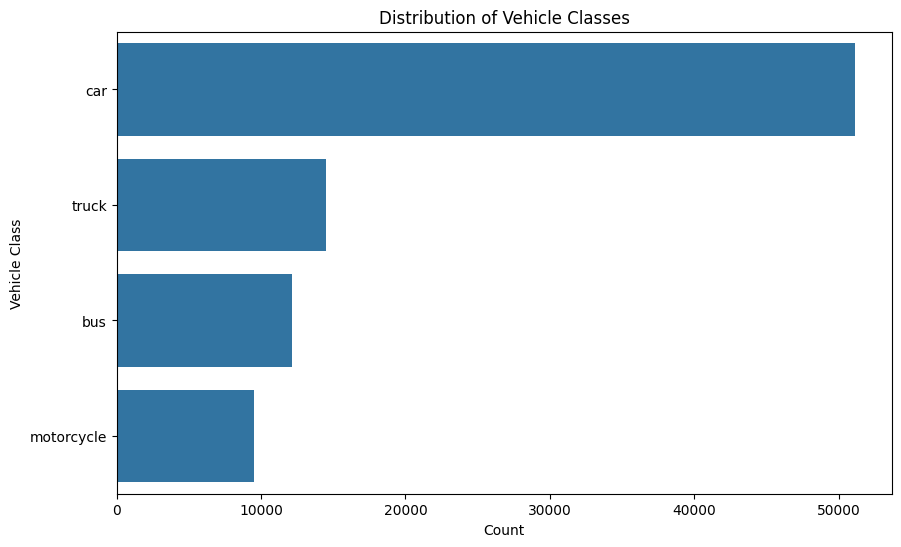

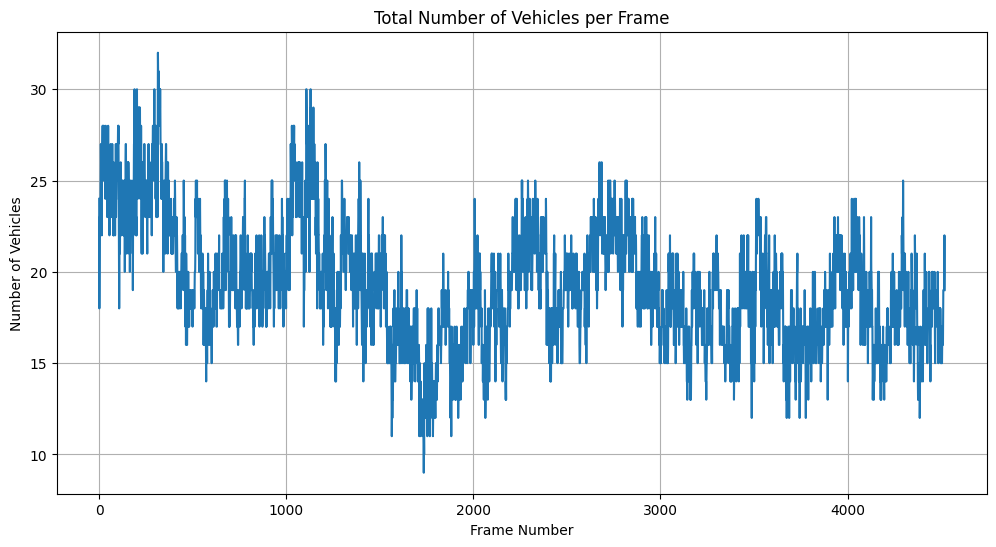

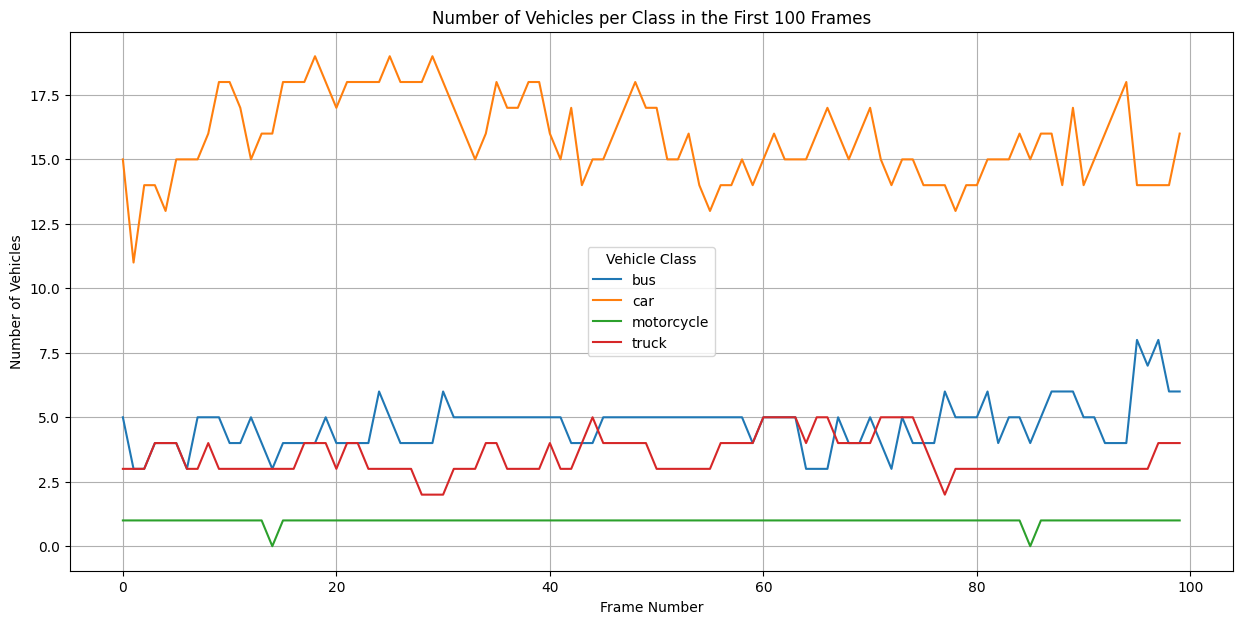

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
try:
    df = pd.read_csv('traces.csv')
    print("CSV file loaded successfully.")
except FileNotFoundError:
    print("Error: traces.csv not found.")
    df = None

if df is not None:
    # Basic EDA
    print("\nDataFrame Info:")
    df.info()

    print("\nFirst 5 rows:")
    display(df.head())

    print("\nValue counts for 'class':")
    display(df['class'].value_counts())

    print("\nDescriptive statistics for numerical columns:")
    display(df.describe())

    # Visualizations

    # 1. Distribution of vehicle classes
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y='class', order=df['class'].value_counts().index)
    plt.title('Distribution of Vehicle Classes')
    plt.xlabel('Count')
    plt.ylabel('Vehicle Class')
    plt.show()

    # 2. Number of vehicles per frame (total count)
    vehicles_per_frame = df.groupby('frame')['id'].count().reset_index()
    plt.figure(figsize=(12, 6))
    plt.plot(vehicles_per_frame['frame'], vehicles_per_frame['id'])
    plt.title('Total Number of Vehicles per Frame')
    plt.xlabel('Frame Number')
    plt.ylabel('Number of Vehicles')
    plt.grid(True)
    plt.show()

    # 3. Number of vehicles per class per frame (first few frames for clarity)
    # Due to the large number of frames, let's visualize for a subset or use a different approach
    # For simplicity, let's show counts for the first 100 frames
    df_subset = df[df['frame'] < 100]
    if not df_subset.empty:
        class_counts_per_frame_subset = df_subset.groupby(['frame', 'class'])['id'].count().unstack(fill_value=0)
        class_counts_per_frame_subset.plot(figsize=(15, 7))
        plt.title('Number of Vehicles per Class in the First 100 Frames')
        plt.xlabel('Frame Number')
        plt.ylabel('Number of Vehicles')
        plt.grid(True)
        plt.legend(title='Vehicle Class')
        plt.show()
    else:
        print("\nNot enough frames to plot per-class counts for the first 100 frames.")

    # Further analysis could include:
    # - Analyzing trajectories (already done with the plot, but could be more detailed)
    # - Calculating speed or distance traveled (requires more complex analysis of cx, cy over time)
    # - Analyzing presence of specific vehicles over time